# ***Assignment 1 Part 1***


## Import the Libraries  & Visualize the Data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('complaint.csv')

In [ ]:
df.head(7)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-2015,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-2015,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2077 non-null   object
 1   Customer Complaint           2077 non-null   object
 2   Date                         2077 non-null   object
 3   Date_month_year              2077 non-null   object
 4   Time                         2077 non-null   object
 5   Received Via                 2077 non-null   object
 6   City                         2077 non-null   object
 7   State                        2077 non-null   object
 8   Zip code                     2077 non-null   int64 
 9   Status                       2077 non-null   object
 10  Filing on Behalf of Someone  2077 non-null   object
dtypes: int64(1), object(10)
memory usage: 178.6+ KB


(2077, 11)

In [ ]:
df.describe()

,Zip code
count,2077.000000
mean,48153.267694
std,28939.754854
min,1075.000000
25%,30062.000000
50%,37212.000000
75%,77084.000000
max,99223.000000


## Question 1 Produce the trend chart about the monthly registered complaints

> 

1.   First I extracted the Date column from the Dataframe
2.   Then I create a list of size 12 to store the count of the complaints month wise. To do this, I iterated over the columns split the Date on **"-"** and count individually.
3. Finally, I plot a line chart between the months and complaints value(obtained from the Step 2)
4. The list **X** is mapped with the **vals** list.







In [ ]:
date = df['Date']
date.head()

0    22-04-2015
1    04-08-2015
2    18-04-2015
3    05-07-2015
4    26-05-2015
Name: Date, dtype: object

In [ ]:
date.shape
vals = [0]*13
for i in range(0,date.shape[0]):
    s = date[i]
    x = s.split("-")
    v = int(x[1])
    
    vals[v] = vals[v] + 1
    
del vals[0]    
vals

[52, 54, 42, 351, 297, 984, 44, 61, 51, 47, 35, 59]

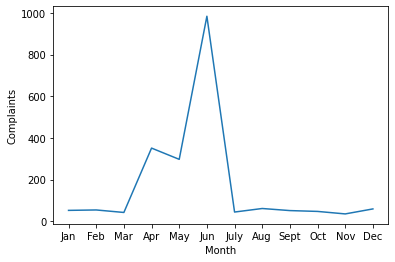

In [ ]:
X = ["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sept","Oct","Nov","Dec"]
y = vals
plt.plot(X,y)
plt.xlabel("Month")
plt.ylabel("Complaints")
plt.show()

## **Question 2** **Generate a tabular output with frequencies of complaints**
> 

1. Here I  used the **value_counts()** method on **Customer Complaint** column.
2. I have converted the particular counter to the csv file so that we can visualize data properly and we can use it directly for future purposes.




In [ ]:
counter = df['Customer Complaint'].value_counts()

counter.to_csv('Freq.csv')
df1 = pd.read_csv('Freq.csv')
df1.head()

,Unnamed: 0,Customer Complaint
0,Internet,18
1,Data Cap,17
2,data cap,12
3,Data Caps,11
4,Data Caps,11


## **Question 3** **Find which complaint types are maximum i.e., internet, network issues, etc.**

> I have taken the csv file and the counter from the prev question to solve this task. Using counter I get the frequencies value. It is also an DataFrame, so I applied head to get top 5 most valued complaints.



In [ ]:
print("Top 5 Complaints with their frequencies are as follows")
print(counter.head(5))


Top 5 Complaints with their frequencies are as follows
 Internet     18
 Data Cap     17
 data cap     12
 Data Caps    11
Data Caps     11
Name: Customer Complaint, dtype: int64


## Question **4** Provide the state wise status of complaint in the form of stacked bar



> 

1.   First I applied GroupBy method on State and Status to make their group and make furthur manipulation easy.
2.   The method `size()` will extract those columns from the Datframe and Unstacking this group will show row wise manipulation of the first label regard to the second label.
3. There may be some values present which are not matched with the first column shown as "Nan". I have changed those Nan to 0
4.Finally there are 2 graph, the first one is using the python scripting and second one by the matplotlib/pandas function. Refrred from [here](https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart)  








In [ ]:
stack = df.groupby(['State','Status'])
stack.first()

Ticket #  ... Filing on Behalf of Someone
State         Status            ...                            
Alabama       Closed    275658  ...                          No
              Open      342392  ...                          No
              Pending   360281  ...                          No
              Solved    359224  ...                          No
Arizona       Closed    243690  ...                         Yes
...                        ...  ...                         ...
Washington    Pending   373653  ...                          No
              Solved    372769  ...                          No
West Virginia Closed    275759  ...                          No
              Open      373879  ...                          No
              Solved    337071  ...                          No

[135 rows x 9 columns]

In [ ]:
stack = stack.size()
stack


State          Status 
Alabama        Closed      8
               Open        4
               Pending     5
               Solved      9
Arizona        Closed      6
                          ..
Washington     Pending     5
               Solved     38
West Virginia  Closed      6
               Open        2
               Solved      2
Length: 135, dtype: int64

In [ ]:
stack = stack.unstack()
stack

Status,Closed,Open,Pending,Solved
State,,,,
Alabama,8.0,4.0,5.0,9.0
Arizona,6.0,2.0,4.0,8.0
Arkansas,1.0,NaN,NaN,4.0
California,69.0,45.0,14.0,82.0
Colorado,21.0,12.0,10.0,32.0
Connecticut,3.0,2.0,1.0,6.0
Delaware,1.0,3.0,1.0,6.0
District Of Columbia,5.0,1.0,1.0,9.0
District of Columbia,NaN,NaN,NaN,1.0


In [ ]:
stack = stack.fillna(0)
stack

Status,Closed,Open,Pending,Solved
State,,,,
Alabama,8.0,4.0,5.0,9.0
Arizona,6.0,2.0,4.0,8.0
Arkansas,1.0,0.0,0.0,4.0
California,69.0,45.0,14.0,82.0
Colorado,21.0,12.0,10.0,32.0
Connecticut,3.0,2.0,1.0,6.0
Delaware,1.0,3.0,1.0,6.0
District Of Columbia,5.0,1.0,1.0,9.0
District of Columbia,0.0,0.0,0.0,1.0


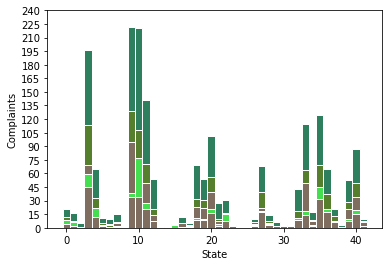

In [ ]:
import matplotlib.pyplot as plt
X = df['State']
bars1 = stack['Closed']
bars2 = stack['Open']
bars3 = stack['Solved']
bars4 = stack['Pending']
bars = np.add(bars1, bars2).tolist()
barss = np.add(bars,bars3).tolist()
r = [i for i in range(0,stack['Closed'].shape[0])]
barWidth = 1
 

plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r,bars4,bottom=bars2,color='#45de50',edgecolor='white',width=barWidth) 
plt.yticks(range(0,250,15))
plt.ylabel('Complaints')
plt.xlabel('State')
plt.show()




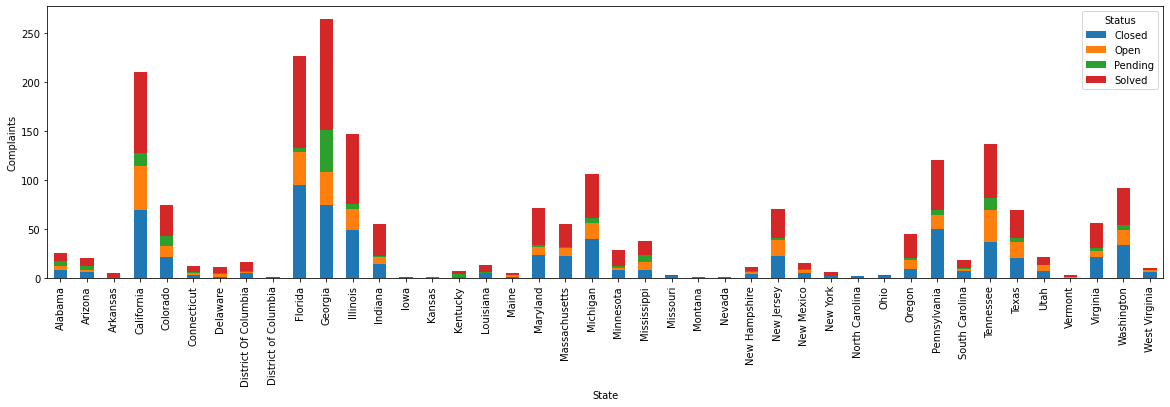

In [ ]:
stack.plot(kind='bar',stacked=True, figsize=(20,5)) 
plt.ylabel('Complaints')
plt.xlabel('State')
plt.show()

## **Question 5** Report which state has registered maximum and minimum complaint


> I created a new column whose values are the sum of the columns Closed Open Solved Pending.


> Then I sort the table on the Total Complaints basis in the ascending order. The Top values will be the states with the minimum complaints and vice versa.





In [ ]:
Closed = stack['Closed']
Open = stack['Open']
Solved = stack['Solved']
Pending = stack['Pending']
Total = Closed + Open + Solved + Pending
stack['Total'] = Total

stack.head()



Status,Closed,Open,Pending,Solved,Total
State,,,,,
Alabama,8.0,4.0,5.0,9.0,26.0
Arizona,6.0,2.0,4.0,8.0,20.0
Arkansas,1.0,0.0,0.0,4.0,5.0
California,69.0,45.0,14.0,82.0,210.0
Colorado,21.0,12.0,10.0,32.0,75.0


In [ ]:
stack = stack.sort_values("Total")
print("States where minimum complaints are registered")
stack[stack['Total'] == stack['Total'].min()]
# stack.head()

States where minimum complaints are registered


Status,Closed,Open,Pending,Solved,Total
State,,,,,
Nevada,1.0,0.0,0.0,0.0,1.0
Kansas,0.0,0.0,1.0,0.0,1.0
Iowa,0.0,0.0,0.0,1.0,1.0
Montana,1.0,0.0,0.0,0.0,1.0
District of Columbia,0.0,0.0,0.0,1.0,1.0


In [ ]:
print("States where maximum complaints are registered")
stack[stack['Total'] == stack['Total'].max()]


States where maximum complaints are registered


Status,Closed,Open,Pending,Solved,Total
State,,,,,
Georgia,74.0,34.0,43.0,113.0,264.0


## Question **6**Which state has the highest and lowest percentage of unresolved complaints


> Total Resolved Complaints will be the Sum of Closed and Solved. Creating a new column with these values.

> Total UnResolved Complaints will be the Sum of Open and Pending. Creating a new column with these values.


> To get the percentage divide the sum of the columns values divide by the particular value.




In [ ]:
stack['resolved'] = stack['Closed'] + stack['Solved']
stack['unresolved'] = stack['Pending'] + stack['Open']
stack['resolved'] = (stack['resolved']/(stack['resolved'].sum()))*100
stack['unresolved'] = (stack['unresolved']/(stack['unresolved'].sum()))*100

In [ ]:
stack['unresolved']

State
Nevada                   0.000000
Kansas                   0.205339
Iowa                     0.000000
Montana                  0.000000
District of Columbia     0.000000
North Carolina           0.000000
Ohio                     0.000000
Missouri                 0.000000
Vermont                  0.205339
Arkansas                 0.000000
Maine                    0.410678
New York                 0.000000
Kentucky                 0.616016
West Virginia            0.410678
Delaware                 0.821355
New Hampshire            0.616016
Connecticut              0.616016
Louisiana                0.205339
New Mexico               0.821355
District Of Columbia     0.410678
South Carolina           0.616016
Arizona                  1.232033
Utah                     1.232033
Alabama                  1.848049
Minnesota                0.821355
Mississippi              3.080082
Oregon                   2.258727
Indiana                  1.642710
Massachusetts            2.053388
Virginia

In [ ]:
stack = stack.sort_values("unresolved")


In [ ]:
print("States where minimum unresolved complaints are registered")
stack[stack['unresolved'] == stack['unresolved'].min()]

States where minimum unresolved complaints are registered


Status,Closed,Open,Pending,Solved,Total,resolved,unresolved
State,,,,,,,
Nevada,1.0,0.0,0.0,0.0,1.0,0.062893,0.0
Iowa,0.0,0.0,0.0,1.0,1.0,0.062893,0.0
Montana,1.0,0.0,0.0,0.0,1.0,0.062893,0.0
District of Columbia,0.0,0.0,0.0,1.0,1.0,0.062893,0.0
North Carolina,2.0,0.0,0.0,0.0,2.0,0.125786,0.0
Ohio,2.0,0.0,0.0,1.0,3.0,0.188679,0.0
Missouri,2.0,0.0,0.0,1.0,3.0,0.188679,0.0
Arkansas,1.0,0.0,0.0,4.0,5.0,0.314465,0.0
New York,2.0,0.0,0.0,4.0,6.0,0.377358,0.0


In [ ]:
print("States where maximum unresolved complaints are registered")
stack[stack['unresolved'] == stack['unresolved'].max()]

States where maximum unresolved complaints are registered


Status,Closed,Open,Pending,Solved,Total,resolved,unresolved
State,,,,,,,
Georgia,74.0,34.0,43.0,113.0,264.0,11.761006,15.811088


# ***Assignment 2***

## **Import the Libraries  & Visualize the Data**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Mart.csv')

In [ ]:
df.head(7)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


(6435, 8)

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## **Question 1 Which store has maximum sales**


> First We groupby the DataFrame according the Store a and then I sort the table according to the Weekly Sales Column in the descending order and then extract the first value from the column



In [ ]:
sales = df[['Store','Weekly_Sales']].groupby(['Store']).sum()
print("Maximum sales comes from")
df = sales.sort_values("Weekly_Sales",ascending = False)
df.head(1)

Maximum sales comes from


,Weekly_Sales
Store,
20,3.013978e+08


##Question 2 Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

 

1.   First I calculated the Standard Deviation using the std method from Dataframe
2.   Then Similarly I calculated the mean using the mean method from Dataframe
3. Divided them in the last to get the ratio.






In [ ]:
stack_std = df.groupby('Store').std()

stack_std.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
1,155980.767761,0.255926,14.250486,0.427313,4.350890,0.383749
2,237683.694682,0.255926,15.492766,0.427313,4.342286,0.615414
3,46319.631557,0.255926,12.645851,0.427313,4.434232,0.447245
4,266201.442297,0.255926,16.180023,0.416967,1.858300,1.421267
5,37737.965745,0.255926,14.225352,0.427313,4.364848,0.387415


In [ ]:
stack_std = stack_std.sort_values("Weekly_Sales",ascending=False)
stack_std.head(1)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
14,317569.949476,0.255926,16.271612,0.443029,3.59482,0.15146


In [ ]:
stack_mean = df.groupby('Store').mean()
stack_mean.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
1,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420
2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846
3,4.027044e+05,0.06993,71.434196,3.219699,219.391531,7.176986
4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692
5,3.180118e+05,0.06993,69.410140,3.219699,216.565581,6.295406


In [ ]:
stack_mean = stack_mean.sort_values("Weekly_Sales",ascending=False)
stack_mean.head(1)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
20,2.107677e+06,0.06993,55.451399,3.417608,209.038131,7.371413


In [ ]:
ratio_cov = (stack_std.iloc[0]['Weekly_Sales'])/stack_mean.iloc[0]['Weekly_Sales']
print(ratio_cov)

0.1506729774108235


## Question 3 Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

1.   Extract those rows from the DataFrame which has Holiday flag =0. Named it df_noholi.
2. Calculate the mean of the Weekly_Sales from this dataframe.
2.   Extract those rows from the DataFrame which has Holiday flag =1. Named it df_holi.
4. Created a new Dataframe df_higher which extract those rows which have higher sales than the mean sales in non holiday season of all the stores.



In [ ]:
df_noholi = df[df['Holiday_Flag']==0] 
df_noholi.head() 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,24-12-2010,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,24-12-2010,3595903.20,0,34.90,2.846,126.983581,7.795


In [ ]:
avg = df_noholi[['Weekly_Sales']].mean()
print(avg['Weekly_Sales'])
avg_weekly_sales = avg['Weekly_Sales']

1041256.3802088547


In [ ]:
df_holi = df[df['Holiday_Flag']==1]
df_holi.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
523,4,25-11-2011,3004702.33,1,47.96,3.225,129.836400,5.143
1381,10,25-11-2011,2950198.64,1,60.68,3.760,129.836400,7.874
1329,10,26-11-2010,2939946.38,1,55.33,3.162,126.669267,9.003
1901,14,26-11-2010,2921709.71,1,46.15,3.039,182.783277,8.724
2811,20,25-11-2011,2906233.25,1,46.38,3.492,211.412076,7.082


In [ ]:
df_higher = df_holi[df_holi['Weekly_Sales']>avg_weekly_sales ]
df_higher.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
523,4,25-11-2011,3004702.33,1,47.96,3.225,129.836400,5.143
1381,10,25-11-2011,2950198.64,1,60.68,3.760,129.836400,7.874
1329,10,26-11-2010,2939946.38,1,55.33,3.162,126.669267,9.003
1901,14,26-11-2010,2921709.71,1,46.15,3.039,182.783277,8.724
2811,20,25-11-2011,2906233.25,1,46.38,3.492,211.412076,7.082


In [ ]:
df_higher['Date']


523     25-11-2011
1381    25-11-2011
1329    26-11-2010
1901    26-11-2010
2811    25-11-2011
           ...    
5721    12-02-2010
3658    09-09-2011
2096    25-11-2011
4824    10-02-2012
3606    10-09-2010
Name: Date, Length: 220, dtype: object

## Question 4 Provide a monthly and 6 month view of sales in units and give insights


>

1.   First I extract the month from the dates using python scripting, I gave a new column to it month_break.
2.   Extract the 2 important features from the Dataframe(Weekly Sales & Month Break) and put them in a seperate Dataframe.
3. Grouped the data according to the month wise and then plot the Stacked bar graph for the respective years.





In [ ]:
df = pd.read_csv('Mart.csv')
df['month_break'] = 0
for i in range(0,df.shape[0]):
    df['month_break'][i] = df['Date'][i][3:]
df.head(30) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_break
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02-2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02-2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02-2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02-2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03-2010
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,03-2010
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106,03-2010
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106,03-2010
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808,04-2010
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808,04-2010


In [ ]:
df_new = df[['month_break','Weekly_Sales']]
df_new.head()

,month_break,Weekly_Sales
0,02-2010,1643690.90
1,02-2010,1641957.44
2,02-2010,1611968.17
3,02-2010,1409727.59
4,03-2010,1554806.68


In [ ]:
stack_date = df_new.groupby('month_break').sum()
stack_date = stack_date.sort_values("month_break")
stack_date.head(10)

,Weekly_Sales
month_break,
01-2011,1.637040e+08
01-2012,1.688945e+08
02-2010,1.903330e+08
02-2011,1.863313e+08
02-2012,1.920636e+08
03-2010,1.819198e+08
03-2011,1.793564e+08
03-2012,2.315097e+08
04-2010,2.314124e+08


In [ ]:
print(stack_date.to_string())

             Weekly_Sales
month_break              
01-2011      1.637040e+08
01-2012      1.688945e+08
02-2010      1.903330e+08
02-2011      1.863313e+08
02-2012      1.920636e+08
03-2010      1.819198e+08
03-2011      1.793564e+08
03-2012      2.315097e+08
04-2010      2.314124e+08
04-2011      2.265265e+08
04-2012      1.889209e+08
05-2010      1.867109e+08
05-2011      1.816482e+08
05-2012      1.887665e+08
06-2010      1.922462e+08
06-2011      1.897734e+08
06-2012      2.406103e+08
07-2010      2.325801e+08
07-2011      2.299114e+08
07-2012      1.875095e+08
08-2010      1.876401e+08
08-2011      1.885993e+08
08-2012      2.368508e+08
09-2010      1.772679e+08
09-2011      2.208477e+08
09-2012      1.806455e+08
10-2010      2.171618e+08
10-2011      1.832613e+08
10-2012      1.843617e+08
11-2010      2.028534e+08
11-2011      2.101624e+08
12-2010      2.887605e+08
12-2011      2.880781e+08


In [ ]:
t = df_new['month_break']
t = t.drop_duplicates()
t = t.sort_values()
(t)

48     01-2011
100    01-2012
0      02-2010
52     02-2011
104    02-2012
4      03-2010
56     03-2011
108    03-2012
8      04-2010
60     04-2011
113    04-2012
13     05-2010
65     05-2011
117    05-2012
17     06-2010
69     06-2011
121    06-2012
21     07-2010
73     07-2011
126    07-2012
26     08-2010
78     08-2011
130    08-2012
30     09-2010
82     09-2011
135    09-2012
34     10-2010
87     10-2011
139    10-2012
39     11-2010
91     11-2011
43     12-2010
95     12-2011
Name: month_break, dtype: object

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
monthly = df.groupby(['Month','Year'])['Weekly_Sales'].sum().unstack().fillna(0)


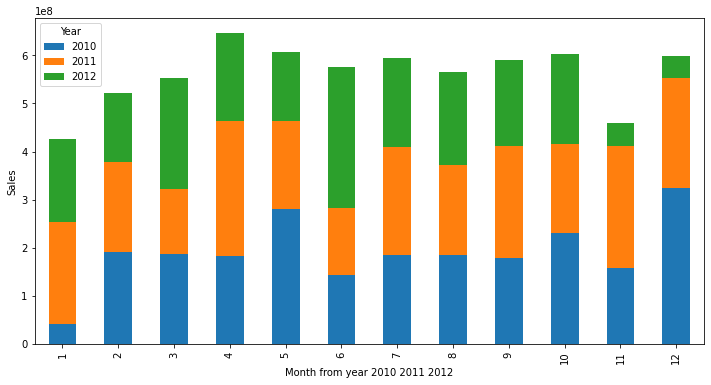

In [ ]:
monthly.plot(kind='bar',stacked=True,figsize=(12,6))
plt.xlabel('Month from year 2010 2011 2012')
plt.ylabel('Sales')
plt.show()

# *Model* 


> 

1.   We have to develop a Linear Regression Model for the Store 2.
2.   First I extract the rows of the Store 2 from the dataframe Mart.csv. We have converted the Date to the Index. Starting from 5-Feb-2010 as 0. 
3. When we draw scatter plot between the Fuel Price and Sales as well between CPI and Sales, We found that yes there is correlation between them.
4. Now I have developed 2 models i) Bivariable Linear Regression Model Comprises of Dates and Weekly Sales Value ii) Multivariable Linear Reg Model to because we find correlation with other data also.

5. For both models first we have calculated X,y split the data using train_test_split and then gave it names X_train,y_train to the training data, X_test,y_test for testing data.
6. Finally I use sklearn linear regression classifier to develop the model and finally test the model on the test data X_test.






In [ ]:
df = pd.read_csv('Mart.csv')
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df_store2 = df[df['Store']==2]
df['Date'] =pd.to_datetime(df.Date)
df_store2 = df_store2.sort_values("Date", axis = 0, ascending = True)
df_store2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
203,2,01-04-2011,1800171.36,0,55.43,3.524,214.488691,7.931
264,2,01-06-2012,1910092.37,0,78.38,3.501,221.385275,6.891
216,2,01-07-2011,1866243.00,0,85.69,3.524,214.836868,7.852
177,2,01-10-2010,1827440.43,0,69.24,2.603,211.329874,8.163
251,2,02-03-2012,1952555.66,0,58.79,3.630,220.486689,7.057


In [ ]:
df_store2 = df_store2.drop(['Store','Holiday_Flag','Fuel_Price','CPI','Unemployment','Temperature'],axis=1)
df_store2.head()

,Date,Weekly_Sales
203,01-04-2011,1800171.36
264,01-06-2012,1910092.37
216,01-07-2011,1866243.00
177,01-10-2010,1827440.43
251,02-03-2012,1952555.66


In [ ]:
print(df_store2.shape)

(143, 2)


In [ ]:
X = []
for i in range(df_store2.shape[0]):
    t = [i]
    X.append(t)
y = df_store2[['Weekly_Sales']]
print(y[0:4])

     Weekly_Sales
203    1800171.36
264    1910092.37
216    1866243.00
177    1827440.43


## Model-1 Linear Regression using 2 Features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42 )

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(X_train,y_train)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-493.59094306]]
Intercept:  [1973268.44966515]


In [ ]:
y_pred = regr.predict(X_test)
print(y_pred)



[[1915518.30932723]
 [1963890.22174702]
 [1932793.9923343 ]
 [1925390.12818841]
 [1945627.35685384]
 [1967345.35834844]
 [1908608.0361244 ]
 [1941185.0383663 ]
 [1940691.44742325]
 [1964383.81269008]
 [1948095.31156913]
 [1934768.35610654]
 [1926870.90101759]
 [1908114.44518134]
 [1923909.35535924]
 [1941678.62930936]
 [1959941.49420255]
 [1939210.67459407]
 [1911569.58178276]
 [1937236.31082183]
 [1967838.9492915 ]
 [1914531.12744111]
 [1918973.44592864]
 [1917492.67309947]
 [1946120.9477969 ]
 [1951056.85722749]
 [1968826.13117761]
 [1971294.08589291]
 [1960435.08514561]
 [1912063.17272582]
 [1957967.13043031]
 [1924896.53724535]
 [1955499.17571502]
 [1965370.9945762 ]
 [1968332.54023456]
 [1927364.49196065]]


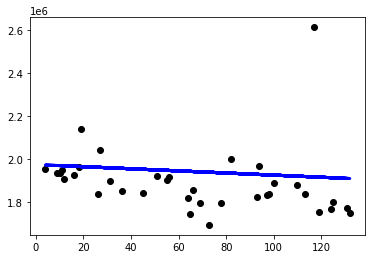

In [ ]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test,y_pred, color='blue', linewidth=3)

###In this section we will look at how different features are affecting the target column Sales. 
###When we plotted the Scatter PLot graph between Fuel_Price, CPI,Unemployment, Temperature. 
###I obsereve that the Unemployment is not affecting the data very much but other 3 are playing significant role because the Scatter plot values are almost same for the whole dataset.

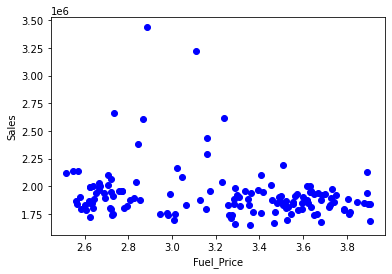

In [ ]:
  
df = pd.read_csv('Mart.csv')
df.head()
df_store2 = df[df['Store']==2]
df['Date'] =pd.to_datetime(df.Date)
df_store2 = df_store2.sort_values("Date", axis = 0, ascending = True)
df_store2.head()

X = df_store2['Fuel_Price']
y = df_store2['Weekly_Sales']
plt.scatter(X, y,  color='blue')
plt.xlabel("Fuel_Price")
plt.ylabel("Sales")
plt.show()





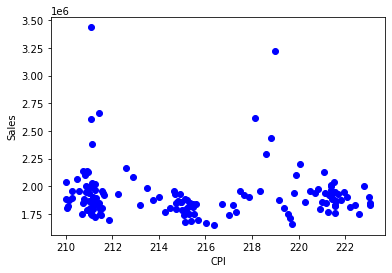

In [ ]:

X = df_store2['CPI']
y = df_store2['Weekly_Sales']
plt.scatter(X, y,  color='blue')
plt.xlabel("CPI")
plt.ylabel("Sales")
plt.show()

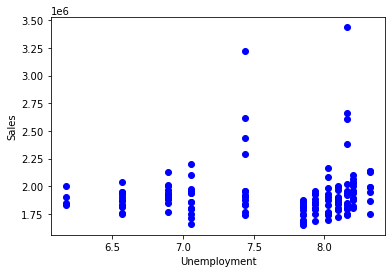

In [ ]:
X = df_store2['Unemployment']
y = df_store2['Weekly_Sales']
plt.scatter(X, y,  color='blue')
plt.xlabel("Unemployment")
plt.ylabel("Sales")
plt.show()



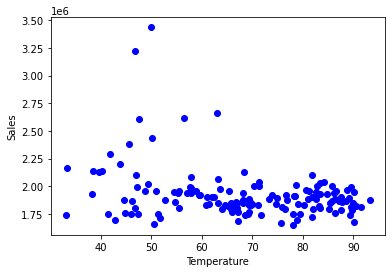

In [ ]:
X = df_store2['Temperature']
y = df_store2['Weekly_Sales']
plt.scatter(X, y,  color='blue')
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.show()

##Model 2 Linear Regression using more than 2 Features(MultiVariable Linear Regression).

In [ ]:
df_store2 = df[df['Store']==2]
df['Date'] =pd.to_datetime(df.Date)
df_store2 = df_store2.sort_values("Date", axis = 0, ascending = True)
df_store2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
177,2,2010-01-10,1827440.43,0,69.24,2.603,211.329874,8.163
151,2,2010-02-04,2066187.72,0,63.27,2.719,210.479887,8.200
164,2,2010-02-07,2003940.64,0,82.74,2.669,210.880373,8.099
145,2,2010-02-19,2124451.54,0,39.69,2.514,210.945160,8.324
146,2,2010-02-26,1865097.27,0,46.10,2.561,210.975957,8.324


In [ ]:
X = []
for i in range(df_store2.shape[0]):
    t = i
    X.append(t)

df_store2['X'] = X
df_store2 = df_store2.drop('Date',axis = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scales = scaler.fit_transform(df_store2)
df_store2 = pd.DataFrame(scales,columns=[df_store2.columns])
df_store2.head(10)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,X
0,0.0,0.099151,0.0,0.600464,0.063891,0.101791,0.925255,0.000000
1,0.0,0.232857,0.0,0.501492,0.147164,0.036807,0.942433,0.007042
2,0.0,0.197997,0.0,0.824271,0.111271,0.067425,0.895543,0.014085
3,0.0,0.265487,0.0,0.110577,0.000000,0.072379,1.000000,0.021127
4,0.0,0.120240,0.0,0.216844,0.033740,0.074733,1.000000,0.028169
5,0.0,0.142368,0.0,0.809184,0.045226,0.090997,0.895543,0.035211
6,0.0,0.204628,0.0,0.270391,0.139268,0.096873,0.925255,0.042254
7,0.0,0.165588,0.0,0.356432,0.147882,0.066887,1.000000,0.049296
8,0.0,0.055893,0.0,0.302387,0.156497,0.051847,1.000000,0.056338
9,0.0,0.253216,0.0,0.808853,0.137114,0.063851,0.942433,0.063380


In [ ]:
y = df_store2[['Weekly_Sales']]
X = df_store2.drop(['Weekly_Sales','Store'],axis =1)
X

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,X
0,0.0,0.600464,0.063891,0.101791,0.925255,0.000000
1,0.0,0.501492,0.147164,0.036807,0.942433,0.007042
2,0.0,0.824271,0.111271,0.067425,0.895543,0.014085
3,0.0,0.110577,0.000000,0.072379,1.000000,0.021127
4,0.0,0.216844,0.033740,0.074733,1.000000,0.028169
...,...,...,...,...,...,...
138,0.0,0.920590,0.703518,0.886626,0.183380,0.971831
139,0.0,0.581233,0.775305,0.998583,0.000000,0.978873
140,0.0,0.609582,0.712132,1.000000,0.000000,0.985915
141,0.0,0.677221,0.842785,0.868874,0.334726,0.992958


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
X_train


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,X
13,0.0,0.118866,0.041637,0.057657,1.000000,0.091549
66,0.0,1.000000,0.839914,0.397511,0.780873,0.464789
57,0.0,0.829741,0.850682,0.376688,0.817549,0.401408
119,0.0,0.227619,0.461594,0.715343,0.411792,0.838028
91,1.0,0.002818,0.364681,0.198351,0.862581,0.640845
...,...,...,...,...,...,...
63,0.0,0.604443,0.882268,0.377955,0.817549,0.443662
70,0.0,0.471817,0.999282,0.416396,0.817549,0.492958
81,0.0,0.952089,0.724336,0.411964,0.780873,0.570423
11,0.0,0.531996,0.201723,0.007768,0.942433,0.077465


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(X_train,y_train)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00912821 -0.1214091  -0.1669598   0.22308807  0.25105693  0.10410555]]
Intercept:  [-0.00417413]


In [ ]:
regr.score(X_test,y_test)

0.19765146859907934

In [ ]:
y_pred = regr.predict(X_test)
print(y_pred)

[[0.15494146]
 [0.08113297]
 [0.18394675]
 [0.11059037]
 [0.17385837]
 [0.09623779]
 [0.25382389]
 [0.09979332]
 [0.16746518]
 [0.15909768]
 [0.14576748]
 [0.12231549]
 [0.1413583 ]
 [0.13983479]
 [0.1559182 ]
 [0.16434211]
 [0.08762547]
 [0.1862695 ]
 [0.21191626]
 [0.16871263]
 [0.16595593]
 [0.14669179]
 [0.19811744]
 [0.17184081]
 [0.18867008]
 [0.10714161]
 [0.2283994 ]
 [0.10699591]
 [0.26880383]
 [0.14762566]
 [0.15744633]
 [0.11726808]
 [0.14100424]
 [0.13312255]
 [0.07464815]
 [0.09939384]]
